In [2]:
import sys
import sklearn
import numpy as np
import os
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

## K - Means

In [5]:
blob_centers = np.array(
    [[0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.6, 2.8],
    [2.6, 2.0]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [6]:
X,y = make_blobs(n_samples=2000, centers = blob_centers,
                cluster_std=blob_std, random_state=7)

In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

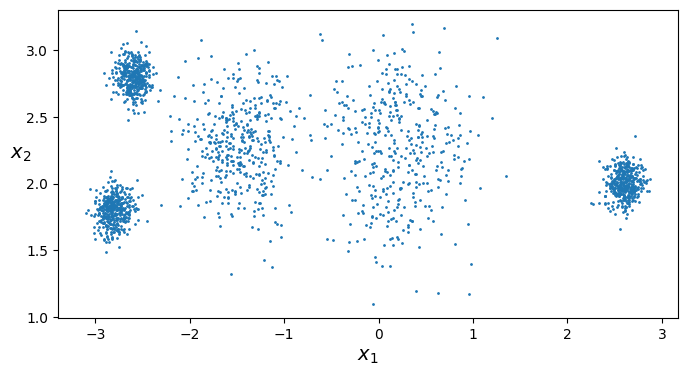

In [8]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [12]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [13]:
y_pred

array([1, 3, 2, ..., 4, 2, 3])

In [14]:
y_pred is kmeans.labels_

True

In [15]:
kmeans.cluster_centers_

array([[-1.45825835,  2.27946272],
       [ 2.59977791,  2.00135806],
       [ 0.20876306,  2.25551336],
       [-2.80404973,  1.80065025],
       [-2.58699798,  2.79502146]])

In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

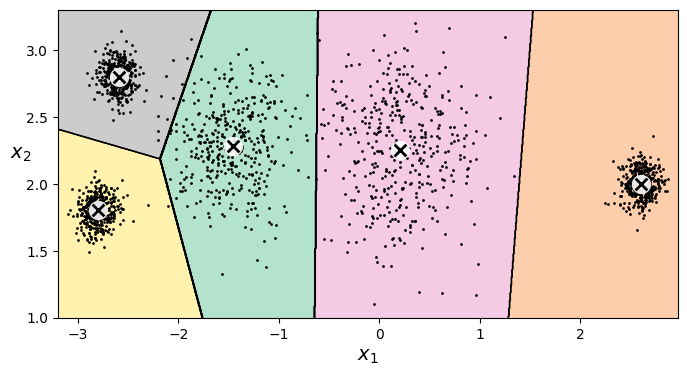

In [17]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [19]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.transform(X_new)

array([[1.48479522, 2.59977827, 0.32995317, 2.81112703, 2.70640309],
       [4.46700873, 0.40022439, 2.80290755, 5.80747222, 5.64327968],
       [1.7018053 , 5.68812785, 3.29399768, 1.21525155, 0.46107144],
       [1.55743507, 5.62193529, 3.21806371, 0.72628272, 0.50755131]])

In [20]:
kmeans.inertia_

209.79501904289071

In [21]:
kmeans.score(X)

-209.79501904289071

In [22]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

99.3 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [24]:
%timeit -n 50 KMeans(algorithm="lloyd", random_state=42).fit(X)

69.8 ms ± 6.53 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini Batch K-Means

In [25]:
from sklearn.cluster import MiniBatchKMeans

In [27]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [28]:
minibatch_kmeans.inertia_

209.8317244090006

In [33]:
%timeit -n 10 MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

84 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
%timeit -n 10 KMeans(n_clusters=5, random_state=42).fit(X)

36.4 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)

In [38]:
y_pred = kmeans_k3.fit_predict(X)

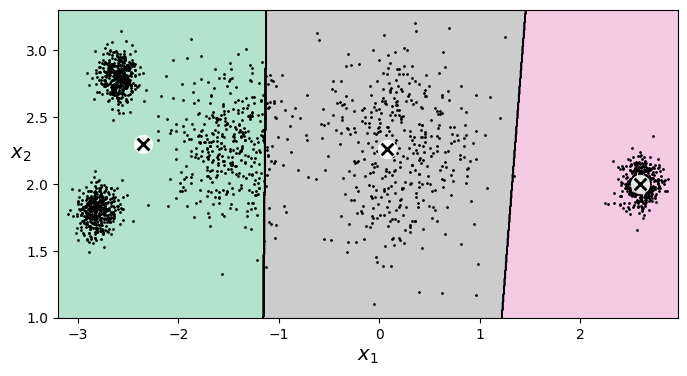

In [39]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_k3, X)
plt.show()

In [40]:
kmeans_k3.inertia_

799.9683106542408

In [41]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

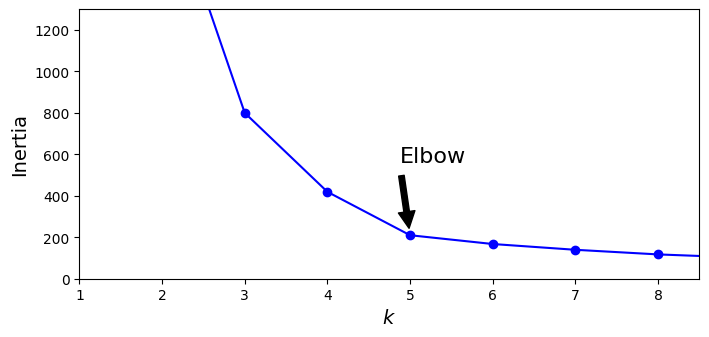

In [52]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.50, 0.50),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [53]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_score(X, kmeans.labels_)

0.738180019022418

In [56]:
silhouette_score = [silhouette_score(X, model.labels_)
                   for model in kmeans_per_k[1:]]

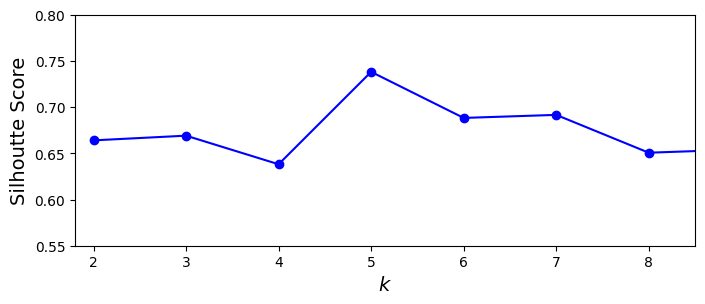

In [60]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10), silhouette_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhoutte Score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.8])
plt.show()